In [1]:
import pickle
import pandas as pd
from collections import Counter

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

note: I combined the first two runs with the other 10 runs

# Results 

In [127]:

from os.path import basename, normpath

for folder in glob("../results/*/"):  # get a list of all sub directories
    with open(folder+'regulons.pkl', 'rb') as f:
        regulon = pickle.load(f)
    # run = basename(normpath(folder))
    # print(run)
        reg_df = pd.DataFrame({
            'TF': [reg.transcription_factor for reg in regulon],
            'genes': [list(reg.genes) for reg in regulon],
            'score': [reg.score for reg in regulon]
        })
        reg_df['size'] = reg_df['genes'].apply(lambda x: len(x))
        reg_df = reg_df.set_index('TF')
        # reg_df.to_csv(folder + 'regulons.csv')

First, make a list of all TFs and their frequency in the results

In [2]:
tfs_counter = Counter()
for folder in glob('../results/*/'):
    regulons_df = pd.read_csv(folder+'regulons.csv', index_col=0)
    tfs_counter.update(regulons_df.index)
    


### Counts per TF

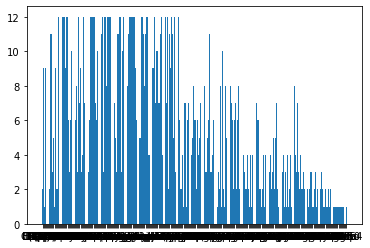

In [3]:
plt.bar(tfs_counter.keys(), tfs_counter.values())
plt.show()


### Frequency of TFs counts

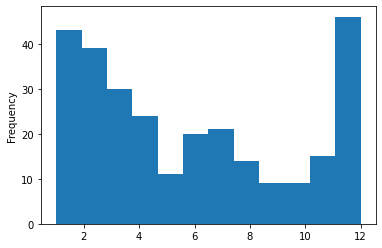

In [4]:
tfs_freq = pd.Series(tfs_counter)
tfs_freq = tfs_freq.sort_values(ascending=False)
ax = tfs_freq.plot.hist(bins=12)

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


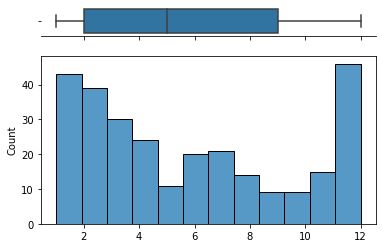

In [5]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(tfs_freq, ax=ax_box)
sns.histplot(tfs_freq, ax=ax_hist, bins=12)
sns.despine(ax=ax_box, left=True)

Produce list of TFs that appear in >80% of the runs

In [7]:
tfs_80 = tfs_freq[tfs_freq > 9]
len(tfs_80) # 70  
# len(tfs_freq)  # 281 
# ~ 26% of regulons


70

## Question to Address: How do genes differ between runs in the same TF regulon? Which genes to choose?

save for each run a regulon sub-matrix with only the 72 TFs that appear in more than 80% of the runs (>9 times).

Note: can do the same for the regulons.pkl, to later use the Regulon methods (i.e intersection..)

In [8]:

for folder in glob('../results/*/'):
    regulons_df = pd.read_csv(folder+'regulons.csv', index_col=0)
    regulons_top_freq = regulons_df.loc[[tf for tf in regulons_df.index if tf in tfs_80.index]]
    regulons_top_freq.to_csv(folder + 'regulons_top80.csv')

Count genes frequencies, for the same TF

In [10]:
from ast import literal_eval
import os 

all_dfs = pd.concat([pd.read_csv(folder + 'regulons_top80.csv', index_col=0) for folder in glob("../results/*/")])
all_dfs_genes = all_dfs['genes']  # keep only genes column, discard size of regulon and score
all_dfs_genes = all_dfs_genes.apply(literal_eval) # convert string to list
all_dfs_genes = all_dfs_genes.explode()
all_dfs_genes = pd.DataFrame(all_dfs_genes).rename({'genes': 'gene'}, axis='columns')
gene_counts = all_dfs_genes.groupby(['TF', 'gene']).size().to_frame('count')
gene_counts.to_csv("../results/gene_counts.csv")

gene_counts = gene_counts.reset_index()
gene_counts


,TF,gene,count
0,CG5245,BuGZ,1
1,CG5245,CDK2AP1,2
2,CG5245,CG11409,1
3,CG5245,CG13920,1
4,CG5245,CG15382,2
...,...,...,...
7043,zld,vnd,1
7044,zld,wdb,1
7045,zld,wech,4
7046,zld,zip,1


### Is there a correlation between regulon size and it's score?

We'll look at one run as an example

In [118]:
run1_regulons = pd.read_csv('../results/run_01/regulons.csv', index_col=0)

,genes,score,size
TF,,,
B-H2,"['capu', 'CG7724', 'CG18507', 'B-H2', 'CG9628'...",3.835759,10
BtbVII,"['Usp2', 'wech']",3.612887,2
CG11586,"['Ppt1', 'thoc6']",2.820949,2
CG17440,"['CG1324', 'Obp56h', 'CG32982', 'CG34170', 'Cd...",0.983616,5
CG17829,"['Orc4', 'lig', 'tam', 'Fit1', 'MED8', 'Spec2'...",1.424293,17
...,...,...,...
twi,"['retn', 'stumps', 'BobA', 'tin', 'Tom', 'pico...",4.319942,22
unc-4,"['Atf3', 'Lim1', 'Hr4', 'unc-4', 'fne', 'hig',...",0.238009,7
usp,"['CG8078', 'CG3909', 'CG10139', 'Vps13', 'usp'...",1.749538,25


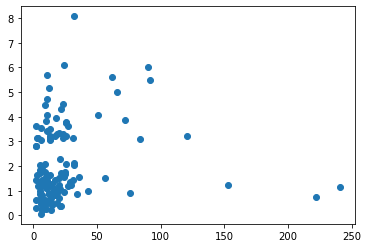

In [121]:
sizes = run1_regulons['size']
scores = run1_regulons['score']
ind = np.argsort(sizes)
plt.clf()
plt.scatter(sizes[ind], scores[ind])
plt.show()

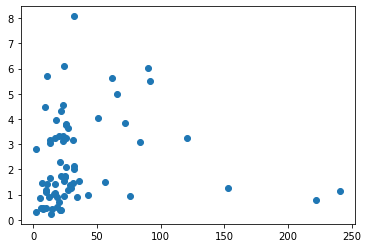

In [130]:
run2_regulons_80 = pd.read_csv('../results/run_02/regulons_top80.csv', index_col=0)
sizes = run2_regulons_80['size']
scores = run2_regulons_80['score']
ind = np.argsort(sizes)
plt.clf()
plt.scatter(sizes[ind], scores[ind])
plt.show()

### Heatmaps for top TFs per run

+ ADD LEGEND FOR CELL TYPE!

+ CHECK ON/OFF ON SPECIFIC GENES AND TFS!

upload cell types annotation per cell 

In [11]:
types_df = pd.read_csv("../data/cell_type.csv", index_col=0) 

In [19]:
lut = dict(zip(types_df.type.unique(), sns.color_palette("hls", len(types_df.type.unique()))))
cell_colors = types_df.type.map(lut)

for folder in glob("../results/*/"):
    auc_mtx = pd.read_csv(folder + "AUCell_mat.csv", index_col=0)
    reg_top80 = pd.read_csv(folder + "regulons_top80.csv", index_col=0)

    row_colors = reg_top80.merge(cell_colors, how='left', left_index=True, right_index=True).type
    
    ax= sns.clustermap(reg_top80, figsize=(12,12),yticklabels=True, xticklabels=True, row_colors=row_colors)
    ax.savefig(folder + "top80_heatmap.png")

/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/danabarilan/opt/miniconda3/envs/devo-grn/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9c40ec57e0> (for post_execute):


KeyboardInterrupt: 

## Networkx visualization of GRNs derived from pySCENIC pipeline

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

create graph

In [15]:
# get gene counts higher/equal than 8
gene_counts_8 = gene_counts.loc[gene_counts['count'].ge(9)]

In [18]:
gene_counts_8.to_csv("../results/gene_counts_top80.csv")

In [16]:
G = nx.from_pandas_edgelist(gene_counts_8[["TF", "gene"]], source='TF', target='gene')

draw graph

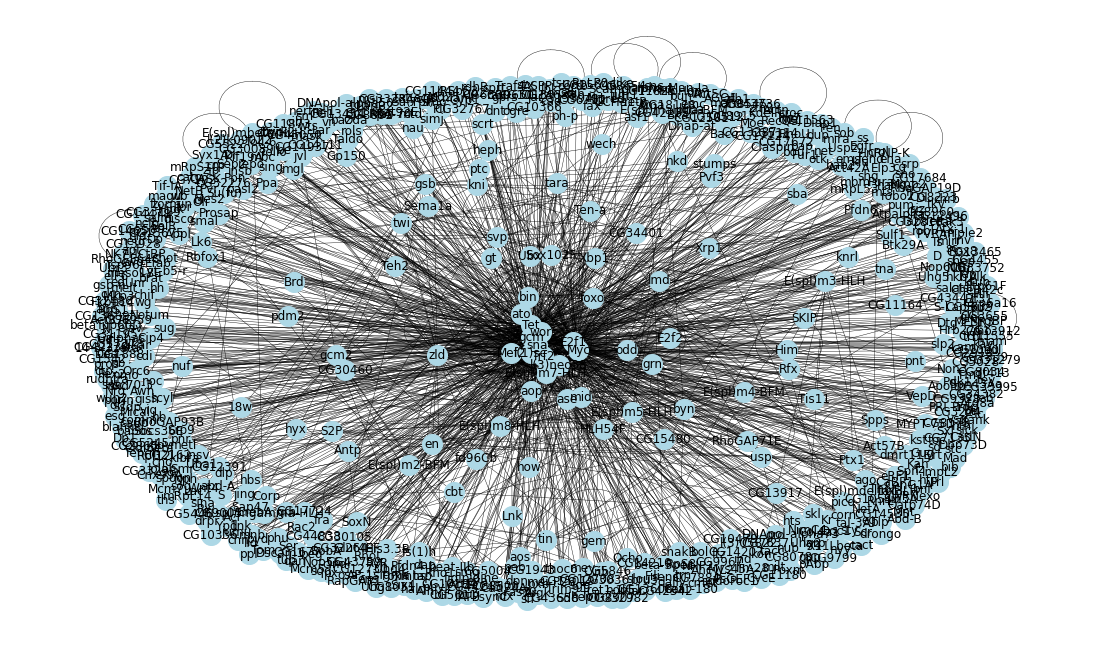

In [17]:
plt.figure(figsize=(15,9))
pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos , with_labels = True, width=0.4, 
        node_color='lightblue', node_size=400)